# Google Apps 商店的数据分析

## 简介

相信大家对移动应用商店都不陌生吧。Google Play Store（Google Play商店）是谷歌官方的软件应用商店，拥有上架软件数十万款，下载量更是突破了20亿次，为了手机用户提供了极为广泛的应用选择，很受大家的欢迎。



本数据集(googleplaystore.csv)包含了 Google Play 商店中 App 的数据。该数据是Kaggle中 [Google Play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps) 的一部分，其中包含 Google Play 商店中 10k+ 应用软件的信息。

数据中的变量含义解释：
```
App: 应用的名称，字符变量。
Category: 应用所属的分类，字符变量。
Rating: 某应用的用户评分，数值变量。
Reviews: 某应用获得的用户评论数量，数值变量。
Size: 某应用的所占存储空间的大小，字符变量。
Installs: 用户安装和下载某应用的次数，字符变量。
Type: 付费或免费，分类变量。
Price: 价格，字符变量。
Content Rating: 应用商店针对内容给出的年龄评级组 - Children / Mature 21+ / Adult，分类变量。
Genres: 类型/流派，一个应用可以属于多个流派，比如音乐、游戏、家庭等，字符变量。
Last Updated: 应用最新更新的日期，字符变量。
Current Ver: 当前应用的版本，字符变量。
Android Ver: 安装该应用所需要的最低安卓版本，字符变量。

```

## 提出问题


**问题**：是否下载数量越多，评论数量就会越多？

**问题**：哪类应用平均下载最多，哪类应用拥有app数量最多？



在提出了问题之后，我们将开始导入数据，并对数据进行探索性分析，来回答上面提出的问题。

## 数据评估和清理

In [1]:
# 请先运行此代码块，以确保在可视化中可以显示中文
!rm -rf ~/.cache/matplotlib/fontList.json
!wget http://d.xiazaiziti.com/en_fonts/fonts/s/SimHei.ttf -O /opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
import matplotlib.pyplot as plt 
%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

--2019-11-08 15:14:09--  http://d.xiazaiziti.com/en_fonts/fonts/s/SimHei.ttf
Resolving d.xiazaiziti.com (d.xiazaiziti.com)... 67.198.189.58
Connecting to d.xiazaiziti.com (d.xiazaiziti.com)|67.198.189.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050868 (9.6M) [application/octet-stream]
Saving to: ‘/opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’

/opt/conda/lib/pyth 100%[===================>]   9.58M  2.96MB/s    in 3.2s    

2019-11-08 15:14:12 (2.96 MB/s) - ‘/opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’ saved [10050868/10050868]



### 关注哪些列
是否下载数量越多，评论数量就会越多？关注Installs和Reviews列

哪类应用下载量平均值最高？关注Category和Installs

哪类应用app数量最多？关注Category

In [2]:
# load pacakges
import numpy as np
import pandas as pd
import seaborn as sb

In [3]:
# load the dataset
raw = pd.read_csv('googleplaystore.csv')

In [4]:
# check the dataset general info
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
raw.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
# clean the data (optional: only there are problems)
df = raw[['App','Category','Installs','Reviews']]
df.columns = ['name','category','install','review']

In [7]:
raw[raw['Installs']=='Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
df = df.drop(10472)

In [9]:
df['review'] = df['review'].astype('float')

In [10]:
def replace_str(x):
    return x.replace('+', '').replace(',','')
df['install'] = df['install'].apply(replace_str)
df['install'] = df['install'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 4 columns):
name        10840 non-null object
category    10840 non-null object
install     10840 non-null float64
review      10840 non-null float64
dtypes: float64(2), object(2)
memory usage: 423.4+ KB


## 数据探索分析

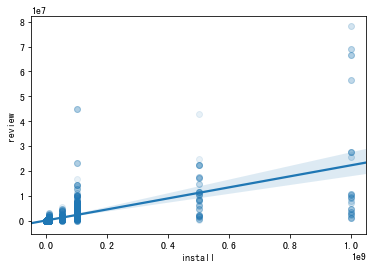

In [11]:
# In exploratory data analysis, please make sure of using statistics and visualizations
# 下载量和评论数的关系
sb.regplot(data=df, x='install', y='review', scatter_kws={'alpha' : 1/10});

In [12]:
np.corrcoef(df['install'],df['review'])

array([[ 1.        ,  0.64312207],
       [ 0.64312207,  1.        ]])

In [13]:
R = 0.64161226
# 决定系数
Rsquared = R ** 2
Rsquared

0.41166629218230766

In [14]:
# 如果app下载量1,000,000,000+ ，评论数有多大概率大于比他评论数小的app
probability = []
df1 = df[df['install']==10**9]['review']
df2 = df[~(df['install']==10**9)]['review']
for i in range(len(df1)):
    prob = sum(df1.iloc[i]>df2) / (sum(df1.iloc[i]>df2) + sum(df1.iloc[i]<df2))
    probability.append(prob)
pd.Series(probability).mean()

0.98485662566602061

In [15]:
# 如果app下载量500,000,000+ ，评论数有多大概率大于比他评论数小的app
probability = []
df1 = df[df['install']==5*(10**8)]['review']
df2 = df[df['install']<5*(10**8)]['review']
for i in range(len(df1)):
    prob = sum(df1.iloc[i]>df2) / (sum(df1.iloc[i]>df2) + sum(df1.iloc[i]<df2))
    probability.append(prob)
pd.Series(probability).mean()

0.98529541446208113

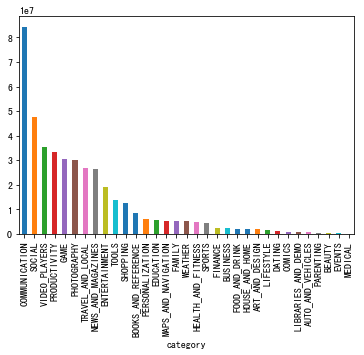

In [16]:
# 各个类别的下载量
group_data = df.groupby('category')
group_data['install'].mean().sort_values(ascending=False).plot(kind='bar');

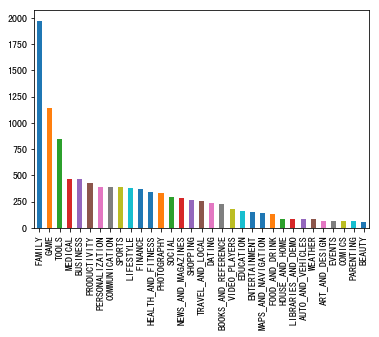

In [17]:
# 各个类别拥有的app数量
df['category'].value_counts().plot(kind='bar');

## 得出结论

**问题**：是否下载数量越多，评论数量就会越多？

**答案**：不是，有些下载量高的APP，评论量没有比它下载量低的app评论数高，但是下载量高的APP有更高的潜力获得高的评论数量，评论数据的变化性有41%是由下载量解释的。如果app下载量1,000,000,000+ ，评论数应该有%98.5的概率大于比他评论数小的app。如果app下载量500,000,000+ ，评论数应该有%98.5的概率大于比他评论数小的app

**问题**：哪类应用下载平均下载量最高，哪类应用有最多的app

**答案**：category为GAME平均下载量最高，category为FAMILY的app数量最多

## 反思

**问题**：在你的分析和总结过程中是否存在逻辑严谨。是否有改进的空间? 你可以从下面的一些角度进行思考：
1. 数据集是否完整，包含所有想要分析的数据？
2. 在对数据进行处理的时候，你的操作（例如删除/填充缺失值）是否可能影响结论？
3. 是否还有其他变量（本数据中没有）能够对你的分析有帮助？
4. 在得出结论时，你是否混淆了相关性和因果性？

**答案**：
数据显示的全部都是相关性，如果要确定因果性需要进行对照试验，因果性的描述像x越大y就越大，应该谨慎用这种描述